<a href="https://colab.research.google.com/github/stefanlazarx/FER/blob/main/P2_w1_descriptors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 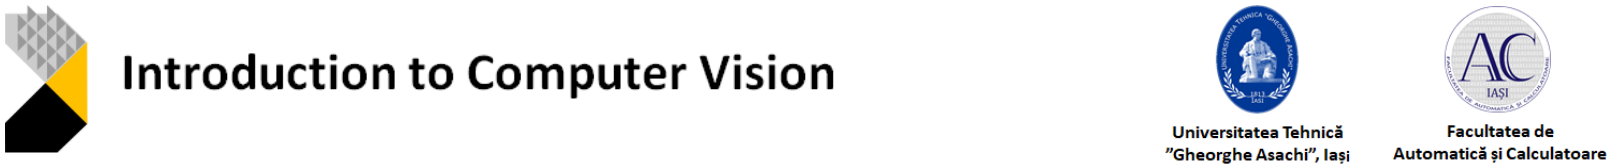

  The Intro to Computer Vision labs will be run in Google Colaboratory, a Jupyter notebook environment that runs entirely in the cloud, you don't need to download anything. To run these labs, you must have a Google account.

Step 1: click on the assignment invite link -> **Accept this assignment**. Refresh page -> individual repo for the specific assignment is created automatically

Step 2: Navigate to http://colab.research.google.com/github -> Click the **Include Private Repos** checkbox -> **select the correct repo** (SistemeDeVedereArtificiala/assignment_name-student_name) -> Click on the jupyter notebook of the current assignment

Step 3: [GitHub sign-in window] In the popup window, sign-in to your Github account and authorize Colab to read the private files.

Step 4: [in colab] **File** -> **Save a copy to GitHub**. Select the correct repository for the SPECIFIC assignment -> Click the **Include Colab Link** -> Click **OK**

Step 5: [in colab] Navigate to the **Runtime** tab --> **Change runtime type**, under **Hardware accelerator** select **GPU/TPU** (tensor processing unit) according to your needs. 
  
  <font color='red'>Read the suggestions and accomplish all tasks marked with **#TODO**.

!!! At the end of each laboratory **REPEAT step 4 in order to SAVE** the answers to your private repository (individual for each assignment)</font>

# Project 2: License plate text recognition

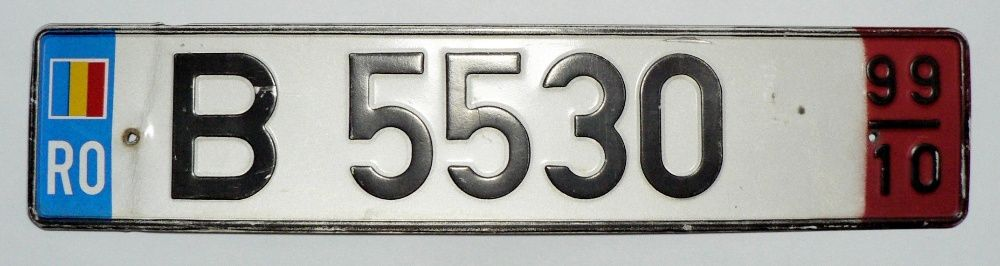

###Label:B
###Prediction output: B
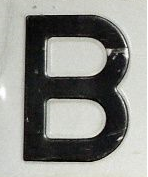

## Week 1: Character classification

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive".

#TODO: add dataset at https://drive.google.com/drive/folders/1cgYRzxXDPMXaJrBFrESsmQUuOzjZi3j2?usp=sharing to My Drive

# check for test image
!ls "/content/drive/My Drive/train_letters/a (1).png"

'/content/drive/My Drive/train_letters/a (1).png'


In [23]:
# function used to load dataset
import cv2
import os
import numpy as np



def load_images_from_folder(folder):
  images = []
  labels = []
  for filename in os.listdir(folder):
    print(filename)
    img = cv2.imread(folder + filename, cv2.IMREAD_GRAYSCALE)
    
    if img is not None:
      inverted_image = cv2.bitwise_not(img)
      images.append(inverted_image)

      #append image label (first letter of image name: a, b, c, ...)
      labels.append(ord(filename[0])-ord('a'))
  return images, labels

In [18]:
#Load images from folder
folder = '/content/drive/MyDrive/train_letters/'

images, labels = load_images_from_folder(folder)

b (8).png
b (9).png
b (7).png
b (10).png
b (1).png
b (3).png
b (6).png
b (4).png
b (11).png
b (2).png
b (5).png
a (9).png
a (1).png
a (3).png
a (6).png
a (5).png
a (2).png
a (11).png
a (8).png
a (4).png
a (7).png
a (10).png


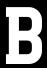

B


In [20]:
#Test if loading was successful
from google.colab.patches import cv2_imshow

cv2_imshow(images[3])
print(chr(labels[3]+65))

### Fourier Descriptors
Let $x[m]$ and $y[m]$ be the coordinates of the mth pixel on the boundary of a given 2D shape containing $N$ pixels, a complex number can be formed as $z[m]=x[m]+jy[m]$, and the Fourier Descriptor (FD) of this shape is defined as the DFT of $z[m]$:

$$Z[k] = DFT[z[m]] = \frac{1}{n}\sum_{m=0}^{N-1}z|m|e^{-j2\pi mk/N}$$

FD can be used as a representation of 2D closed shapes independent of its location, scaling, rotation and starting point. For example, we could use $M < N$ FDs corresponding to the low frequency components of the boundary to represent the 2D shape. The reconstructed shape based on these FDs approximate the shape without the details (corresponding to the high frequency components susceptible to noise). However, note that since the Fourier transform is a complex transform, the frequency spectrum has negative frequencies as well as positive frequencies, with the DC component in the middle. Therefore the inverse transform with $M< N$ components needs to contain both positive and negative terms:

$$ ẑ[m]=\sum_{k = -M/2}^{M/2} Z[k] e^{j2\pi mk/N} (m = 0, ..., N-1)$$




To compute the FD:

1. Find object contour (see cv2.findContours)
2. Create complex numbers using the (x, y) coordinates of the contour points: z = x + jy
3. Compute the Fourier transform for every complex number



In [ ]:
# Function to compute the fourier descriptors
def findDescriptor(img):
    """ findDescriptor(img) finds and returns the
    Fourier-Descriptor of the image contour"""
    contour = []
    #Find object contour
    contour, hierarchy = cv2.findContours(
        img,
        cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_NONE,
        contour)

    #TODO: Create complex number using (x, y) coordinates of the contour points
    # 1. extract X and Y vectors from contour
    # code here

    # 2. create a numpy.array of the same size for complex data type (see numpy.empty, dtype=complex)
    # code here

    # 3. populate real & imag parts with extracted X and Y vectors
    # code here

    #TODO: Apply Fourier Transform (see numpy.fft)
    #code here

    return fourier_result

#Function that keeps a desired number of fourier descriptors (degree)
def truncate_descriptor(descriptors, degree):
    #this function truncates an unshifted fourier descriptor array and returns one also unshifted
    descriptors = numpy.fft.fftshift(descriptors)
    center_index = len(descriptors) / 2
    descriptors = descriptors[int(center_index - (degree / 2)):int(center_index + (degree / 2))]
    descriptors = numpy.fft.ifftshift(descriptors)
    return descriptors

###Input shape and different number of Fourier Descriptors (10, 50, 300)

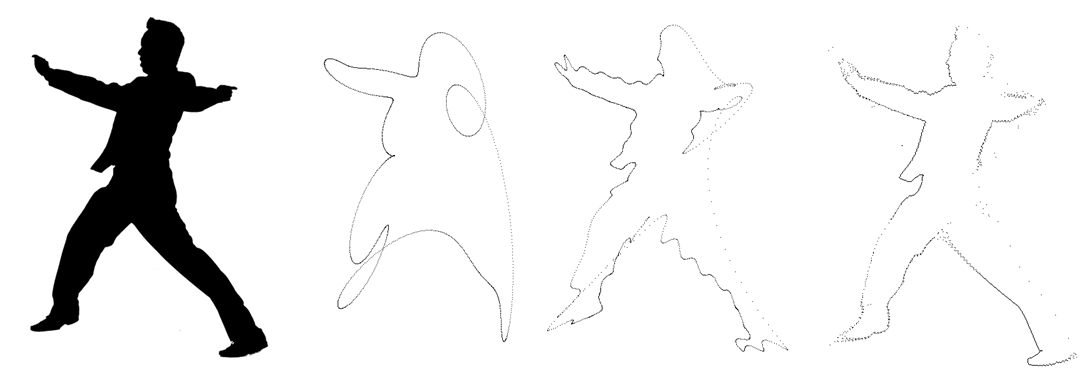

### What are Hu Moments?
**Hu Moments** ( or rather **Hu moment invariants** ) are a set of 7 numbers calculated using **central moments** that are invariant to image transformations. The first 6 moments have been proved to be invariant to **translation**, **scale**, and **rotation**, and **reflection**. While the 7th moment’s sign changes for image reflection.

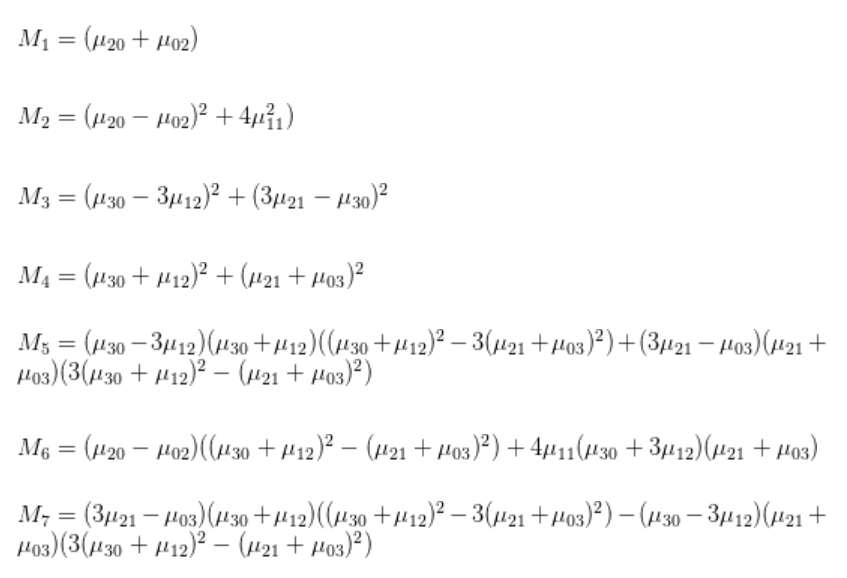

```markdown
Further reading: Analysis of Hu's moment invariants on image scaling and rotation (https://ieeexplore.ieee.org/document/5485542)
```

In [21]:
#TODO: Function that computes Hu Moments
# Steps:
# 1. threshold image (see cv2.threshold)
# 2. calculate moments (see cv2.moments)
# 3. compute Hu Moments (see cv2.HuMoments)

def fd_hu_moments(image):
  #step 1 => threshold
  ret, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


  #step2 => moments
  moments = cv2.moments(thresh)
  huMoments = cv2.HuMoments(moments)

  huMoments = np.asarray(huMoments)
  huMoments = -np.sign(huMoments) * np.log10(np.abs(huMoments))
  
  return huMoments.flatten()

### Test Hu Moments by performing geometric transformations

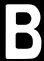

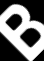

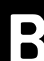

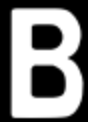

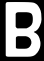

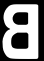

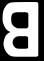

Moment 1
2.7837078898936842
2.820094385325683
2.892843320324626
2.7864233487218213
2.7837078898936847
2.7837078898936842
2.7837078898936847
Moment 2
6.819143689659696
6.37326971084236
6.66206229265541
6.812421208196446
6.819143689659697
6.819143689659696
6.819143689659697
Moment 3
11.547134228764351
10.563363792904234
10.255130425893872
11.481658978987822
11.547134228764337
11.547134228764342
11.547134228764355
Moment 4
11.385583164071242
11.344524333647781
10.431034967110799
11.54382437131716
11.385583164071258
11.385583164071242
11.38558316407126
Moment 5
-23.64132689280609
22.694298155402436
21.034426922369875
23.78755107725067
-23.641326892806106
-23.641326892806116
-23.641326892806134
Moment 6
14.80341895926523
14.818453682593887
14.079632234763148
14.952068236850069
14.803418959265244
14.803418959265226
14.803418959265246
Moment 7
-22.85774650956942
-22.336733041873174
20.852054784414683
-23.06419367536908
22.857746509569434
22.857746509569413
-22.85774650956945


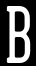

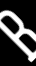

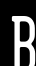

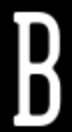

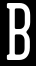

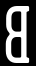

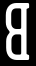

Moment 1
2.889535284577848
2.935217627108239
2.937298486340504
2.8952163415148453
2.889535284577848
2.889535284577848
2.889535284577848
Moment 2
6.409141596241302
6.321412662796401
6.376688808674182
6.424504255256152
6.409141596241302
6.409141596241302
6.409141596241302
Moment 3
11.779834812835352
12.291058287162013
10.607487737755463
11.72228388626795
11.779834812835325
11.779834812835322
11.77983481283535
Moment 4
11.873029091084485
12.83962074280161
10.714439986837661
11.91282124921733
11.873029091084486
11.873029091084488
11.873029091084486
Moment 5
23.71195948474197
-26.400001880175207
21.655001327116135
23.801237124572893
23.711959484741957
23.711959484741957
23.711959484741975
Moment 6
15.247921642357602
16.032794686689936
14.122218557231307
16.01995796646516
15.247921642357616
15.247921642357612
15.2479216423576
Moment 7
-24.32562951410634
-25.407193327215268
21.44551473886288
24.008009215763394
24.325629514106428
24.325629514106407
-24.325629514106318


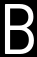

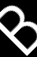

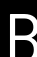

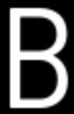

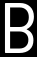

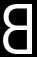

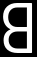

Moment 1
2.9456516554366243
2.9612799283631084
2.988454229020783
2.938755191731466
2.9456516554366243
2.9456516554366243
2.9456516554366243
Moment 2
6.7003752453043814
6.630819159231381
6.669580994322444
6.690181289363939
6.700375245304382
6.7003752453043814
6.700375245304382
Moment 3
11.967794716723144
11.420830839388309
10.845772030769352
11.85688340866767
11.96779471672311
11.967794716723073
11.967794716723096
Moment 4
15.22771321637381
11.913719306302747
11.287943863144875
13.969910730815657
15.227713216374296
15.227713216374683
15.227713216374294
Moment 5
28.835795937803034
23.730641126077256
22.39491245826796
27.601705104698564
28.83579593780361
28.835795937804303
28.835795937803645
Moment 6
-18.589607177478136
15.604236031305819
14.734967423891772
17.31947512472775
-18.589607177478527
-18.589607177479007
-18.58960717747856
Moment 7
-29.491964262482746
-23.73238111347678
22.741295827527264
26.89139924442958
29.491964262486253
29.49196426248412
-29.49196426248534


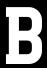

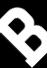

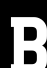

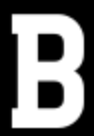

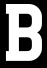

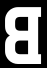

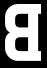

Moment 1
2.7788922399260563
2.810304069098877
2.8925485152240533
2.779801283878892
2.7788922399260563
2.7788922399260563
2.7788922399260563
Moment 2
6.615535462721618
6.293437634403988
6.545817081842741
6.617934297261888
6.615535462721619
6.615535462721618
6.615535462721619
Moment 3
10.822920854970997
11.32383564606751
9.866389053291622
10.828369043572254
10.822920854970985
10.822920854970969
10.82292085497098
Moment 4
10.83724171937681
12.065499001547137
10.174701828794602
10.872402524451783
10.83724171937681
10.837241719376808
10.837241719376811
Moment 5
21.667323014093455
-23.84165690829174
20.727018182308424
21.72310193741257
21.667323014093448
21.66732301409344
21.667323014093448
Moment 6
14.393497050250344
-15.301083413879411
13.849522615408638
14.457750227513973
14.393497050250351
14.393497050250348
14.393497050250346
Moment 7
25.396935504418014
-24.012462320208765
20.21486659703955
23.143114190694018
-25.39693550438911
-25.396935504404325
25.396935504430367


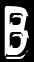

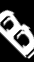

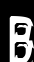

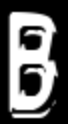

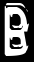

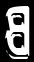

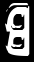

Moment 1
2.8299463922379404
2.850315635872949
2.8904001845000336
2.828278914381849
2.8299463922379404
2.8299463922379404
2.8299463922379404
Moment 2
6.25796514349902
6.11605275565607
6.342161334492829
6.254493395676796
6.25796514349902
6.25796514349902
6.25796514349902
Moment 3
12.149280625243
10.37741762669003
10.428864053218492
12.054948562997055
12.149280625243039
12.14928062524301
12.149280625243017
Moment 4
11.592485533289828
10.521449842196025
10.141487083453658
11.55538521138845
11.592485533289826
11.592485533289834
11.59248553328983
Moment 5
-23.806596793859196
20.97238238662796
20.539129840703325
-23.523438887813352
-23.806596793859207
-23.806596793859228
-23.806596793859196
Moment 6
-14.813778315780564
13.586992990641125
13.412594974457107
-14.832783420560492
-14.813778315780574
-14.813778315780574
-14.813778315780572
Moment 7
-23.513416404901136
-22.05213641899606
20.623338795223923
-23.4993623446227
23.513416404901157
23.513416404901143
-23.51341640490115


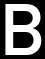

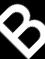

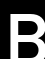

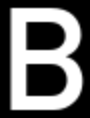

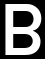

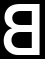

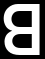

Moment 1
2.867215553630076
2.889050062222914
2.9389318107811273
2.8719218001102775
2.867215553630076
2.867215553630076
2.867215553630076
Moment 2
6.9617353966083995
6.711589369533034
6.869039587001356
6.994431380036226
6.9617353966083995
6.9617353966083995
6.9617353966084
Moment 3
11.5300837715679
12.02528493206644
10.389987394716137
11.5154290839284
11.530083771567876
11.530083771567872
11.530083771567895
Moment 4
12.000301463277305
11.959528639450237
10.852330389927404
12.569358937842853
12.000301463277314
12.000301463277307
12.000301463277298
Moment 5
23.77886228707718
23.953370137823175
21.577166219878386
-24.963047284250102
23.77886228707719
23.778862287077175
23.77886228707717
Moment 6
-15.495560713524574
15.38207062233102
14.440228071348255
-16.821592887514186
-15.495560713524588
-15.49556071352458
-15.495560713524567
Moment 7
-24.377484480974477
25.04264708595258
21.683805209672776
-24.65975796772661
24.377484480974417
24.377484480974424
-24.377484480974452


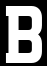

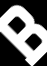

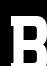

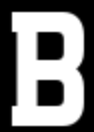

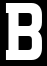

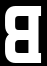

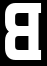

Moment 1
2.755746922329362
2.7946025289796257
2.8784342012506148
2.769911592847751
2.755746922329362
2.755746922329362
2.755746922329362
Moment 2
6.715231755373115
6.3038190546369375
6.550660424092639
6.75183722353835
6.715231755373115
6.715231755373115
6.715231755373115
Moment 3
11.003584634748009
11.093480358894602
9.822338533894623
10.992345198720423
11.003584634748005
11.003584634748005
11.00358463474801
Moment 4
10.810084809106625
12.175998704305275
10.128717580290495
10.838556035980963
10.81008480910663
10.810084809106625
10.810084809106629
Moment 5
21.79531136547221
-23.835007695417772
20.621672397735686
21.754364342493457
21.79531136547221
21.795311365472205
21.795311365472212
Moment 6
14.280532282161127
-15.900968458606464
13.847135105426524
14.5448993876897
14.280532282161136
14.28053228216113
14.280532282161134
Moment 7
-21.97617930123011
24.298607063119793
20.125271662230137
-23.145809740700937
21.976179301230133
21.97617930123012
-21.976179301230125


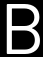

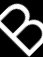

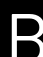

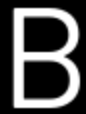

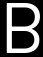

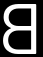

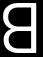

Moment 1
2.9876554866227534
2.99838938854346
3.0282726839667973
2.980473699993415
2.9876554866227534
2.9876554866227534
2.9876554866227534
Moment 2
7.159113742684658
7.00679712966394
7.04016613944145
7.1595320585245625
7.159113742684658
7.159113742684658
7.159113742684658
Moment 3
12.110948304375981
12.279971631559842
11.074276956670964
12.057377351058598
12.110948304375986
12.110948304375999
12.110948304375986
Moment 4
13.149248602673707
13.348219036459547
11.674114967392427
13.217655479793537
13.149248602673712
13.149248602673703
13.149248602673692
Moment 5
-25.81327869863471
26.16692459065021
23.244375175750932
-25.860086920244576
-25.813278698634736
-25.813278698634708
-25.813278698634715
Moment 6
-16.73532876159882
17.3820525954388
15.504669589073465
-16.79780733851832
-16.73532876159883
-16.735328761598815
-16.735328761598808
Moment 7
-26.199166714576208
-27.00113172635989
23.161194305473884
-26.680239063486717
26.19916671457613
26.199166714576254
-26.19916671457606


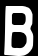

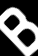

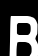

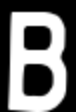

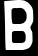

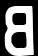

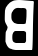

Moment 1
2.843544411376785
2.871511583964489
2.9324145021878376
2.842543316243833
2.8435444113767847
2.843544411376785
2.8435444113767847
Moment 2
6.760142250692857
6.413720873079628
6.6184879607798015
6.761133337842127
6.760142250692857
6.760142250692857
6.760142250692856
Moment 3
11.023053317276174
10.241442706828103
10.095949421923274
11.032297699240821
11.023053317276192
11.02305331727619
11.023053317276172
Moment 4
11.008288909472656
10.87664290220535
10.329299728436585
11.056065172109921
11.008288909472656
11.008288909472654
11.008288909472656
Moment 5
-22.154883518303105
21.56056579963846
20.63907381348397
-22.261731018292206
-22.154883518303098
-22.154883518303105
-22.154883518303098
Moment 6
14.45850648083967
14.231780571058792
13.767045233236702
14.48398486039728
14.458506480839672
14.458506480839672
14.45850648083967
Moment 7
-22.196010995400414
-21.615272100354375
20.76334793216235
-22.240319779160235
22.19601099540044
22.196010995400428
-22.19601099540042


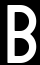

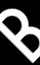

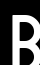

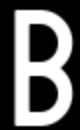

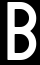

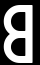

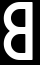

Moment 1
2.8363095048543303
2.8899025732162706
2.913902660653647
2.8520330812265735
2.8363095048543303
2.8363095048543303
2.8363095048543303
Moment 2
6.477797387794732
6.334336752904372
6.444431121504451
6.511163140689881
6.477797387794732
6.477797387794732
6.477797387794731
Moment 3
11.22921189284321
11.28706410316183
10.187177242969916
11.267159016894608
11.229211892843221
11.229211892843203
11.22921189284319
Moment 4
11.380566942783226
12.83750196198914
10.426979898342104
11.419134563515243
11.380566942783231
11.380566942783222
11.380566942783231
Moment 5
22.838798272746683
25.361880661641948
20.87453060093123
22.76597038384649
22.838798272746704
22.838798272746672
22.838798272746665
Moment 6
14.662358040170977
-16.14809704387389
13.806695491462191
15.010326089499655
14.66235804017098
14.662358040170975
14.662358040170988
Moment 7
-22.833180773625973
24.92731472110964
20.89510342490697
23.649044314350196
22.83318077362598
22.833180773625966
-22.833180773625987


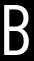

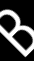

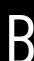

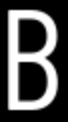

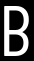

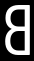

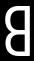

Moment 1
2.9039794674031625
2.9400984783359867
2.9432597896794195
2.89032923232933
2.9039794674031625
2.9039794674031625
2.9039794674031625
Moment 2
6.367229201747644
6.363917139657138
6.40854479816134
6.340558673009478
6.367229201747644
6.367229201747644
6.367229201747644
Moment 3
12.992802873713712
11.479166508354975
10.593274575817212
12.992041666025466
12.99280287371378
12.99280287371367
12.992802873713764
Moment 4
12.092114398845554
11.57159469823481
10.80165423639243
11.908456952235019
12.092114398845561
12.092114398845569
12.092114398845563
Moment 5
-24.63876164918204
23.109098137353513
21.533412906762102
-24.364313596695368
-24.638761649182076
-24.63876164918203
-24.638761649182072
Moment 6
-16.027549473742678
14.77632956072871
14.046734908654006
-15.426374842033425
-16.02754947374273
-16.027549473742777
-16.027549473742727
Moment 7
25.49400596057402
-23.72958356655957
21.916806562409157
25.155502789399165
-25.494005960574427
-25.494005960574437
25.494005960574402


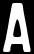

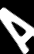

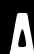

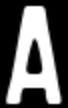

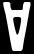

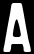

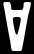

Moment 1
2.847319499736616
2.8670811523827116
2.9633862441733143
2.845022157944477
2.847319499736616
2.847319499736616
2.847319499736616
Moment 2
6.595839921202533
6.31589693210354
6.682936230489679
6.592218843670105
6.595839921202533
6.595839921202533
6.595839921202532
Moment 3
10.362162843932925
11.171436596973631
10.045371130169043
10.357610487599688
10.362162843932929
10.362162843932929
10.362162843932925
Moment 4
10.769299490374962
11.018357852838248
10.442366149296916
10.759427196468488
10.76929949037496
10.76929949037496
10.769299490374962
Moment 5
21.344724882081575
22.566826153137008
-21.697232335204415
21.32497315434876
21.344724882081575
21.344724882081575
21.34472488208158
Moment 6
14.071628213617707
14.177339305075721
14.094480535380221
14.059099753582124
14.071628213617705
14.071628213617704
14.071628213617707
Moment 7
22.014980357576874
22.1419631480181
20.688308898535524
22.066438722520875
-22.01498035757688
-22.01498035757688
22.014980357576874


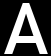

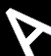

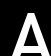

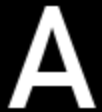

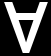

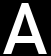

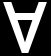

Moment 1
2.965680228616299
2.9678176944067887
3.033660149978449
2.9640803919891243
2.965680228616299
2.965680228616299
2.965680228616299
Moment 2
8.680671242242456
7.863288744962837
8.0250539689907
8.682494130631007
8.680671242242457
8.680671242242457
8.68067124224246
Moment 3
10.843099475627207
11.306304679506995
10.871574957453227
10.838365098381876
10.8430994756272
10.843099475627202
10.843099475627206
Moment 4
11.420466271569328
11.870745630536188
10.831222225240648
11.42013847666673
11.420466271569328
11.420466271569332
11.420466271569325
Moment 5
22.595568968910072
23.624849558154448
-21.693669548265895
22.598388235634733
22.59556896891007
22.595568968910072
22.595568968910065
Moment 6
15.789026493896422
-17.125173142598122
-14.910766218223413
15.792039468539654
15.789026493896422
15.789026493896426
15.789026493896419
Moment 7
22.923582906444924
-23.595699554391587
22.334842703478593
22.896716882151278
-22.923582906444917
-22.923582906444928
22.923582906444924


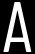

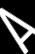

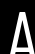

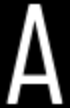

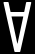

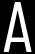

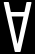

Moment 1
2.9606804363379653
2.9661212518645828
3.0207766583221876
2.9555710181998087
2.9606804363379657
2.9606804363379653
2.9606804363379653
Moment 2
6.813959823600115
6.614989221465269
6.900686417940393
6.806588613974837
6.813959823600116
6.813959823600116
6.813959823600117
Moment 3
10.906657554564132
11.579155068566395
10.91419869200434
10.863480939407212
10.906657554564127
10.906657554564127
10.906657554564132
Moment 4
11.578295347212613
11.70991121960344
10.965894707718576
11.476708506138475
11.578295347212618
11.578295347212617
11.578295347212613
Moment 5
22.827267442199304
-23.723435783190627
-22.72613541655533
22.652543994539418
22.82726744219931
22.827267442199307
22.827267442199307
Moment 6
14.988925219682663
15.021888588085416
14.637368021514428
14.882660551171417
14.988925219682669
14.988925219682667
14.988925219682665
Moment 7
-23.586077571105864
23.39828476723063
21.910969282572676
-23.4385595374554
23.586077571105903
23.586077571105886
-23.586077571105854


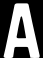

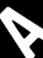

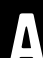

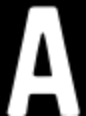

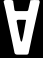

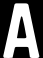

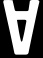

Moment 1
2.847556318038181
2.8617715694197376
2.9589653844114823
2.848894082519146
2.8475563180381815
2.847556318038181
2.8475563180381815
Moment 2
7.236917077343103
6.597291260581333
7.079574867757638
7.216538016721177
7.2369170773431035
7.236917077343103
7.2369170773431035
Moment 3
10.303401119548425
11.060865751058884
10.097858480722966
10.327588309441865
10.303401119548418
10.30340111954842
10.303401119548425
Moment 4
10.645962396525523
11.190045345861323
10.368069735231607
10.609417538682305
10.645962396525523
10.645962396525524
10.645962396525519
Moment 5
21.140391618701425
-22.41398550772563
-20.754998276529147
21.097267801851988
21.140391618701422
21.14039161870143
21.140391618701422
Moment 6
14.274545295812839
14.507202301938543
-15.062227927615144
14.22712687170248
14.274545295812839
14.274545295812842
14.274545295812835
Moment 7
21.651064555903837
22.534578240003334
20.74815334493116
21.612588847775374
-21.65106455590383
-21.651064555903826
21.651064555903826


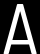

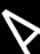

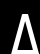

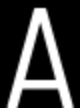

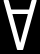

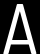

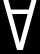

Moment 1
3.0009052888789545
2.99757511032464
3.0585688156848976
2.996492817552265
3.0009052888789545
3.0009052888789545
3.0009052888789545
Moment 2
7.255688361712409
6.979730739313632
7.3505533143836885
7.262646028153126
7.255688361712409
7.2556883617124095
7.255688361712409
Moment 3
11.046812114137152
12.65333173872628
11.139175961242762
11.024087848969664
11.046812114137149
11.046812114137147
11.046812114137154
Moment 4
11.567864111599633
11.667263863869394
11.224740156769947
11.454801132901798
11.567864111599638
11.567864111599636
11.567864111599635
Moment 5
22.87520563086662
-23.846105258092837
-22.57217480894093
22.694394986257798
22.875205630866628
22.87520563086662
22.875205630866624
Moment 6
15.195708832622705
15.196256304546978
15.294777653748229
15.086186797001021
15.195708832622712
15.195708832622708
15.195708832622708
Moment 7
25.277433353009386
24.371047699471227
22.543216367633416
24.27557678742993
-25.27743335301001
-25.2774333530111
25.277433353010572


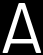

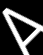

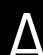

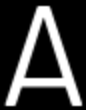

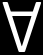

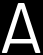

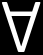

Moment 1
3.0107008257178767
3.0132028126010315
3.063723375211944
3.006664103288193
3.0107008257178767
3.0107008257178767
3.0107008257178767
Moment 2
7.355928841726231
7.1932987034341656
7.492602885118086
7.359395353212097
7.3559288417262305
7.355928841726231
7.3559288417262305
Moment 3
10.819772064249179
11.553909819327659
11.08566974699884
10.80186200868512
10.819772064249188
10.819772064249175
10.819772064249191
Moment 4
11.91903542291008
12.573800326955048
11.331700730013113
11.799663238176075
11.919035422910085
11.919035422910083
11.919035422910083
Moment 5
23.311225392170694
-25.315111184202717
-22.89185958398742
23.115189333999652
23.31122539217071
23.311225392170694
23.3112253921707
Moment 6
15.607842202109044
16.332389484777213
15.5700453235569
15.486516898026117
15.607842202109051
15.607842202109047
15.607842202109046
Moment 7
23.78927362157105
-24.647464171117647
22.58834665427642
23.69154867645051
-23.789273621571063
-23.789273621571105
23.78927362157111


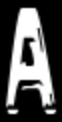

Moment 1
2.836460490843991
2.867648520282096
2.8953462461190957
2.833309066867757
2.836460490843991
2.836460490843991
2.836460490843991
Moment 2
6.157519789315516
6.1129825746900694
6.243213756593275
6.150766495047575
6.157519789315516
6.157519789315516
6.157519789315516
Moment 3
11.192497532055839
11.563486982014792
9.903014997612885
11.173080206926294
11.19249753205582
11.192497532055835
11.192497532055821
Moment 4
12.091324849099138
11.570212249152059
10.035399065516154
12.052972227776046
12.091324849099161
12.091324849099129
12.091324849099164
Moment 5
24.36403821039361
23.277478268280177
20.095668025873607
24.452004283926062
24.364038210393456
24.36403821039349
24.36403821039349
Moment 6
15.548047458543644
14.699425788240003
13.224938205417823
15.46470161436775
15.548047458543724
15.548047458543662
15.548047458543722
Moment 7
-23.745463030726025
23.29816810352099
20.237256983113433
-23.671895378578032
23.745463030726064
23.745463030726018
-23.745463030726068


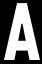

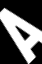

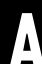

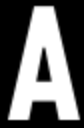

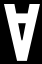

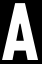

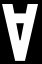

Moment 1
2.825171672244408
2.8461724656111365
2.9436103540913674
2.8249915274506336
2.825171672244408
2.825171672244408
2.825171672244408
Moment 2
6.614461959331452
6.3469397070024085
6.718503531461976
6.609412625285324
6.614461959331452
6.614461959331452
6.614461959331452
Moment 3
10.118337042509362
11.934391118870039
9.875546213692958
10.12336406691762
10.11833704250937
10.118337042509362
10.11833704250937
Moment 4
10.346242953712144
11.11594435474425
10.157982390754421
10.38282456838856
10.346242953712146
10.346242953712144
10.346242953712146
Moment 5
20.674887838299686
-22.66995067301734
-21.46497634979651
20.74010907097781
20.67488783829969
20.674887838299686
20.67488783829969
Moment 6
13.701327156872376
14.415063571969764
13.922481508540953
13.739501363830179
13.701327156872377
13.701327156872376
13.701327156872376
Moment 7
20.801372110797022
-23.09376203508306
20.17531799555019
20.845398719381627
-20.80137211079703
-20.801372110797026
20.801372110797033


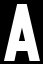

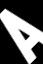

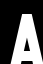

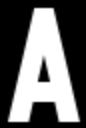

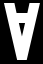

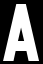

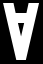

Moment 1
2.8290660010068596
2.841921050481204
2.9453898630963407
2.82839148454976
2.8290660010068596
2.8290660010068596
2.8290660010068596
Moment 2
6.7135090062148475
6.377920268784882
6.827131243828517
6.710509716837378
6.7135090062148475
6.7135090062148475
6.7135090062148475
Moment 3
10.221711970126147
11.961889201511834
9.964070364858925
10.21827648173162
10.221711970126153
10.22171197012615
10.22171197012615
Moment 4
10.238916238057946
10.792444026635035
10.096259851611734
10.236063455256874
10.238916238057945
10.238916238057946
10.238916238057945
Moment 5
20.485393561196812
-22.681562475859167
-21.078379671890417
20.47946402974503
20.485393561196812
20.485393561196812
20.485393561196812
Moment 6
13.603785120662721
14.064007136628257
13.901788974875783
13.599630324310292
13.60378512066272
13.603785120662721
13.60378512066272
Moment 7
21.041375053373155
22.19120111815572
20.129151226338656
21.03450797134596
-21.041375053373155
-21.041375053373155
21.04137505337315


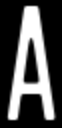

Moment 1
2.8568948010761916
2.8857352189208942
2.9166325770768338
2.8537799372732713
2.8568948010761916
2.8568948010761916
2.8568948010761916
Moment 2
6.183054279828527
6.114151928359918
6.248468394873842
6.177325270460405
6.183054279828527
6.183054279828527
6.183054279828527
Moment 3
10.753908062294926
11.52030791715316
10.209209205493563
10.736444241813617
10.753908062294945
10.75390806229493
10.753908062294942
Moment 4
11.474560746877934
11.392512389646011
10.344126957008948
11.435143487365574
11.47456074687795
11.47456074687793
11.474560746877954
Moment 5
22.5990004268443
22.90658721137033
20.782209774029937
22.5299855180777
22.599000426844334
22.5990004268443
22.599000426844338
Moment 6
14.572101538553913
14.452510522287549
13.56040867316919
14.528809769307939
14.572101538553929
14.572101538553909
14.572101538553932
Moment 7
23.257842599149434
23.165039461356074
20.760931361428476
23.215542601032094
-23.257842599149463
-23.25784259914946
23.257842599149487


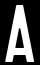

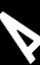

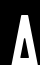

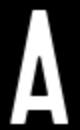

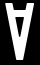

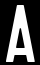

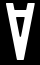

Moment 1
2.902114941182608
2.915432365095696
2.9816281981247807
2.9007950752646856
2.902114941182608
2.902114941182608
2.902114941182608
Moment 2
6.645943261440697
6.4068761339051745
6.8109736853819935
6.643782699484772
6.645943261440697
6.645943261440697
6.645943261440697
Moment 3
10.829338769275482
11.125450494288602
10.637725095404923
10.822511049365005
10.829338769275491
10.829338769275482
10.829338769275491
Moment 4
10.605527011843806
10.964401228202599
10.456006808395854
10.588168611409811
10.605527011843803
10.605527011843806
10.605527011843803
Moment 5
21.329259376710734
22.093910293304678
-21.991800392223542
21.29891625540738
21.329259376710734
21.329259376710734
21.32925937671073
Moment 6
13.931527245556406
14.187676188338747
13.99757142544674
13.912776112734196
13.931527245556403
13.931527245556406
13.931527245556405
Moment 7
-22.094827028408627
22.254982729481977
21.005169935936568
-22.098073037730828
22.094827028408623
22.094827028408623
-22.094827028408627


In [24]:
#TODO: compute huMoments on rotated, translated, scaled, flipped (horizontal, vertical, both) input shapes
# (see cv2.getRotationMatrix2D, cv2.warpAffine, cv2.resize)
# https://docs.opencv.org/4.1.2/da/d6e/tutorial_py_geometric_transformations.html

for img in images:
  cv2_imshow(img)
  (h, w) = img.shape[:2]
  (cX, cY) = (w // 2, h // 2)

  #TODO: rotate image (see cv2.getRotationMatrix2D, cv2.warpAffine)

  M = cv2.getRotationMatrix2D((cX, cY), 45, 1)
  rotated = cv2.warpAffine(img, M, (w, h))
  cv2_imshow(rotated)
 
  tx, ty = 5.0, 10.0
  MT = np.float32([[1.0, 0.0, tx], [0.0, 1.0, ty]])
  translated = cv2.warpAffine(img, MT, (w, h))
  cv2_imshow(translated)


  fx, fy = 2, 2
  scaled = cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
  cv2_imshow(scaled)


  flipVertical = cv2.flip(img, 0)
  cv2_imshow(flipVertical)

  flipHorizontal = cv2.flip(img, 1)
  cv2_imshow(flipHorizontal)

  flipBoth = cv2.flip(img, -1)
  cv2_imshow(flipBoth)

  hu_img = fd_hu_moments(img)
  hu_rot = fd_hu_moments(rotated)
  hu_trans= fd_hu_moments(translated)
  hu_scal = fd_hu_moments(scaled)
  hu_flipV = fd_hu_moments(flipVertical)
  hu_flipH = fd_hu_moments(flipHorizontal)
  hu_flipVH = fd_hu_moments(flipBoth)
  

  for i in range(0, 7):
    print("Moment "+str(i+1))
    print(hu_img[i])
    print(hu_rot[i])
    print(hu_trans[i])
    print(hu_scal[i])
    print(hu_flipV[i])
    print(hu_flipH[i])
    print(hu_flipVH[i])